# Liquid-liquid equilibrium in polymer solutions

## Estimation of Flory-Huggins interaction parameter from XS test data

### Paper 2

This notebook contains an estimation procedure for the parameters of the Flory-Huggins model applied to the LLE data presented in [MATOS *et al.* (2002)](https://onlinelibrary.wiley.com/doi/full/10.1002/app.11055).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from Tompa import Tompa

In [3]:
####################
# EXPERIMENTAL DATA
####################

z_sol = 0.97738

labels = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H11']

teta1 = 1e-4*np.array([[0.72, 1.839], [0.92, 2.848], [1.62, 8.512],
                       [1.66, 5.513], [2.24, 3.986], [0.0, 6.440],
                       [1.04, 3.001],[0.70, 1.764],[1.11,4.369],[0.98,4.546]])

teta2 = 1e-4*np.array([[2.57, 8.218], [2.40, 10.12], [4.52, 20.59],
                      [4.30, 16.91], [4.22, 14.98], [3.73, 16.54],
                      [3.26, 10.49],[2.82, 5.96],[3.16, 12.89],[3.46, 13.18]])

alpha = np.array([[0.801, 0.1967],[0.777, 0.1693],[0.601, 0.1648],
                  [0.609, 0.1397],[0.664, 0.0214],[0.000, 0.1380],
                  [0.665, 0.1598],[0.947,0.2064],[0.613,0.0868],[0.637,0.0828]])

mw = np.array([865,730,396,395,313,202,600,977,559,603])

xs = 1e-2*np.array([5.30,7.89,4.96,7.26,3.86,4.61,6.21,5.49,4.52,5.86])

# creating list of objects for each polymer
polymers = [Tompa(label=labels[i], z_sol = z_sol,
                  shulz_kind='3P', r_pol = np.arange(1e1,4e4),
                  teta1 = teta1[i], teta2 = teta2[i],
                  alpha = alpha[i],xs_fraction = xs[i]) 
            for i in range(len(labels))]


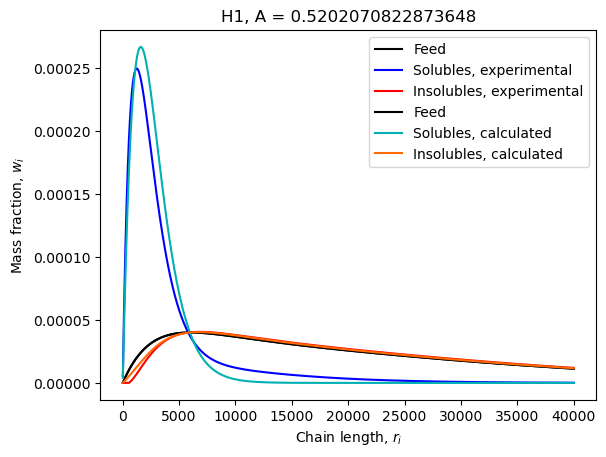

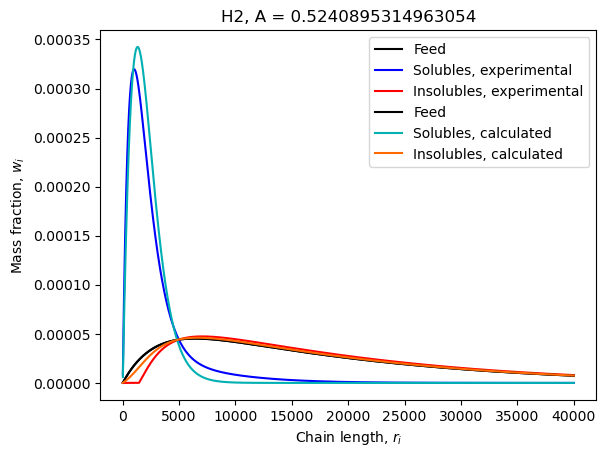

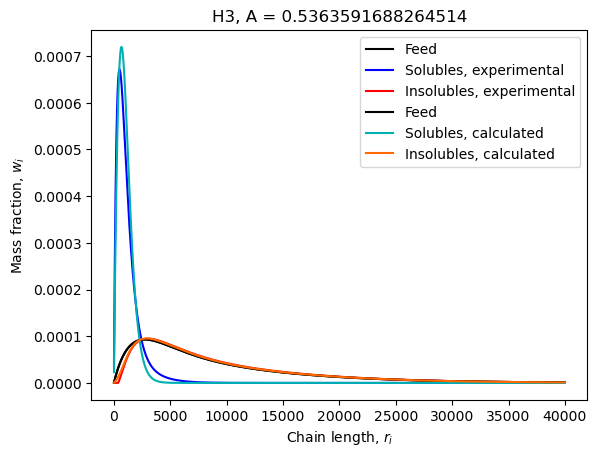

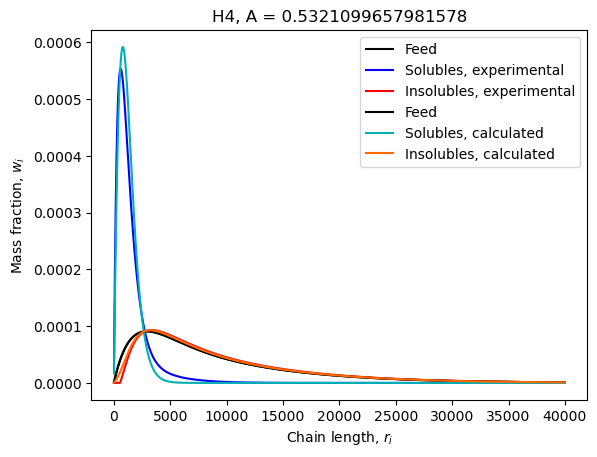

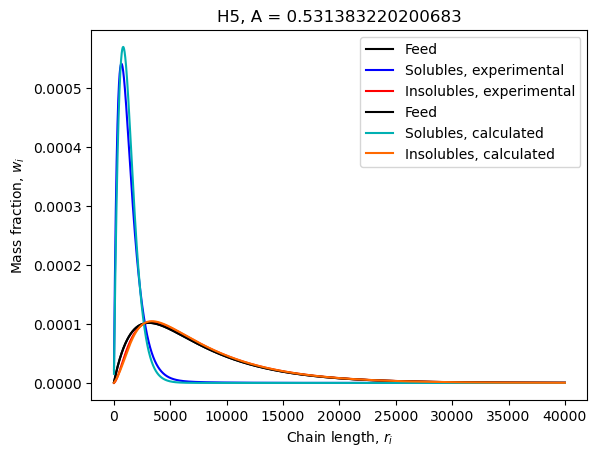

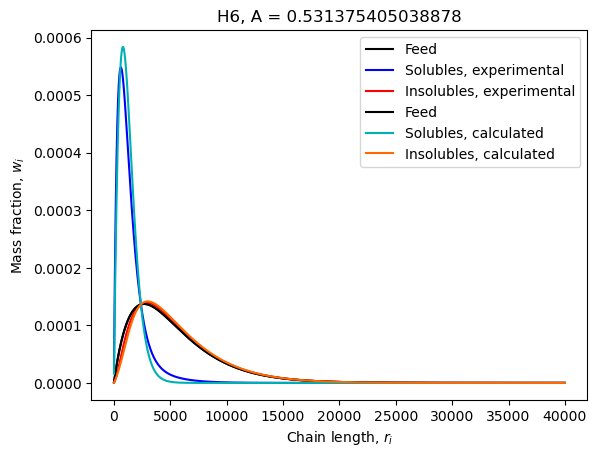

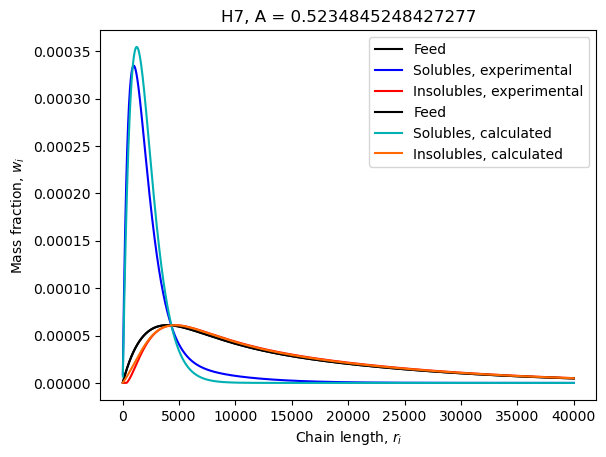

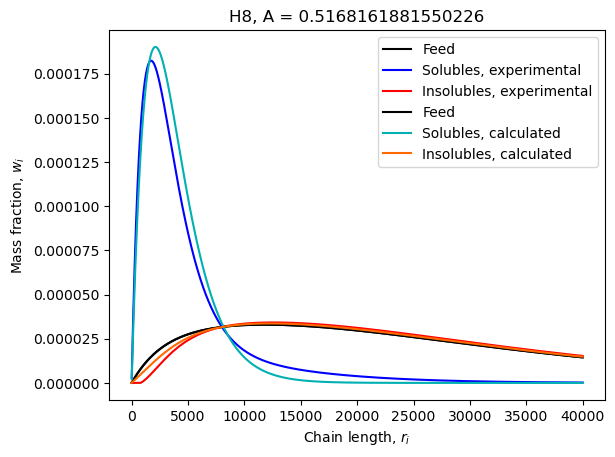

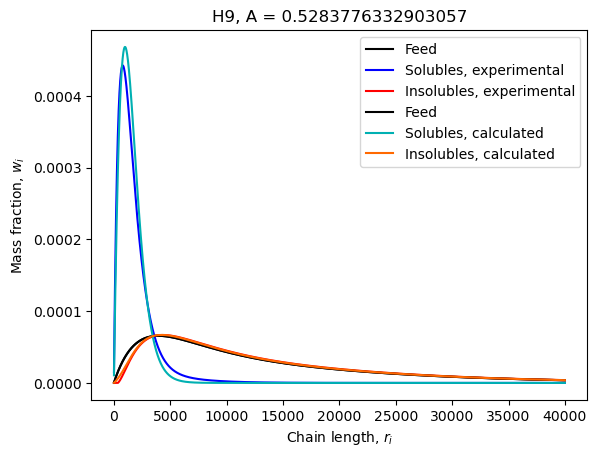

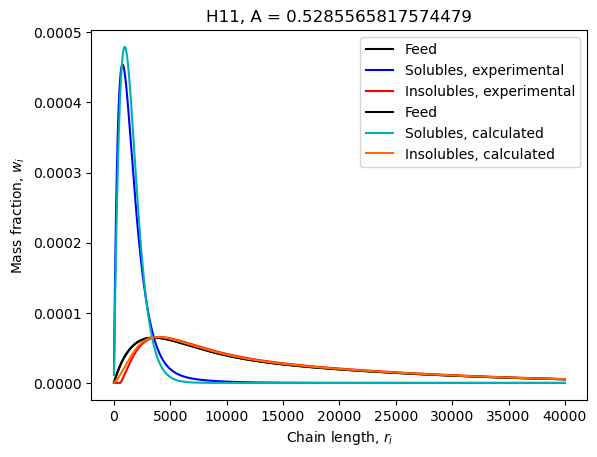

In [4]:
for p in polymers:
    p.estimation()
    plt.figure()
    p.plot_Experimental_Distributions()
    p.plot_Calculated_Distributions()

In [5]:
chi = [p.A for p in polymers]

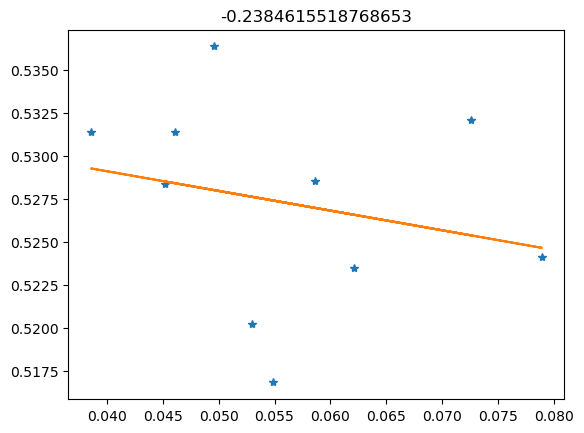

In [6]:
a, b = np.polyfit(xs, chi, 1)

plt.plot(xs,chi,'*');
plt.plot(xs,a*xs+b)
plt.title((np.corrcoef(xs, chi)[0,1]));

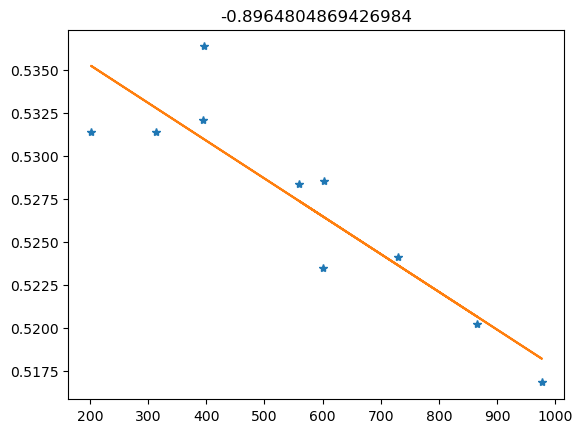

In [7]:
a, b = np.polyfit(mw, chi, 1)

plt.plot(mw,chi,'*');
plt.plot(mw,a*mw+b)
plt.title((np.corrcoef(mw, chi)[0,1]));